# Tarea Semanal N°1
###### Matías Blas Tassone R4052

&emsp;1.&emsp;&emsp;A partir del siguiente circuito se calcula la función transferencia $T(s) = \frac{V_2 (s)}{V_1 (s)}$ partiendo de las ecuaciones $(1)$ y $(2)$

<center><img src="./TS1-circ2.png"></center>

&emsp;&emsp;$$ (1) \;\;\;\;\; V_x = V_1.\frac{R_3}{R_3+\frac{1}{sC}} = V_1.\frac{sCR_3}{1+sCR_3} $$
&emsp;&emsp;$$ (2) \;\;\;\;\; \frac{V_1-V_x}{R_1} = \frac{V_x-V_2}{R_2} $$

Donde $(1)$ parte de analizar el divisor de impedancias entre $C$ y $R_3$ y $(2)$ se obtiene porque la corriente que circula por $R_1$ y la que circula por $R_2$ es la misma. Después de algo de álgebra en la ecuación $(2)$ se reeemplaza $V_x$ con lo obtenido en $(1)$

$$ (2') \;\;\;\;\; \frac{R_1}{R_2}.V_2 = V_x.(1+\frac{R_1}{R_2}) - V_1 $$

&emsp;&emsp;$$ (1)\;\; en \;\; (2') \;\;\;\;\; \frac{R_1}{R_2}.V_2 =  V_1.\frac{sCR_3}{1+sCR_3}.(1+\frac{R_1}{R_2}) - V_1$$ 

$$T(s) = \frac{V_2 (s)}{V_1 (s)} = \frac{R_2}{R_1}.[(1+\frac{R_1}{R_2}).\frac{sCR_3}{1+sCR_3}-1] $$

$$T(s) = \frac{V_2 (s)}{V_1 (s)} = \frac{R_2}{R_1}.[\frac{(R_1+R_2) . sCR_3}{R_2+sCR_2R_3}-1] $$

$$T(s) = \frac{V_2 (s)}{V_1 (s)} = \frac{R_2}{R_1}.[\frac{sCR_1R_3+sCR_2R_3-R_2-sCR_2R_3}{R_2+sCR_2R_3}] $$

$$T(s) = \frac{V_2 (s)}{V_1 (s)} = \frac{1}{R_1}.[\frac{sCR_1R_3-R_2}{1+sCR_3}] = \frac{sCR_3-\frac{R_2}{R_1}}{1+sCR_3} $$

$$T(s) = \frac{V_2 (s)}{V_1 (s)} = \frac{s-\frac{R_2}{R_1R_3C}}{s+\frac{1}{R_3C}}$$

$$|T(\omega)|^2 = \frac{\frac{R_2^2}{(R_1R_3C)^2}+\omega^2}{\frac{1}{(R_3C)^2}+\omega^2} \;\;\;\;\;\;\;\;\;\;
\phi(\omega)= tg^{-1}(-\frac{\omega R_3R_1C}{R_2})-tg^{-1}(\omega R_3C)$$

<center><img src="./polos.jpeg" width="350"></center>

&emsp;2.&emsp;&emsp;Como el valor de $\frac{1}{R_3C}$ simboliza una $\omega$, la utilizaremos como norma $\Omega_\omega=\omega_0=\frac{1}{R_3C}$, entonces la función transferencia normalizada nos quedaría

$$ $=\frac{s}{\Omega_\omega}\;\;\;\;\;\;\;\;\;\; T_N($)=\frac{$.\omega_0-\frac{R_2}{R_1}.\omega_0}{$. \omega_0+\omega_0} = \frac{$-R_2/R_1}{$+1}$$

En este caso, $\omega_0$ representa el valor en el que se encuentra el polo de la transferencia y la ubicación del cero pasará a depender exclusivamente de la relacion entre $R_2$ y $R_1$.

&emsp;3.&emsp;&emsp;Para la simulación de la función transferencia normalizada, se parametrizo la relación entre $R_2$ y $R_1$ y a través del siguiente código se le fueron dando los distintos valores

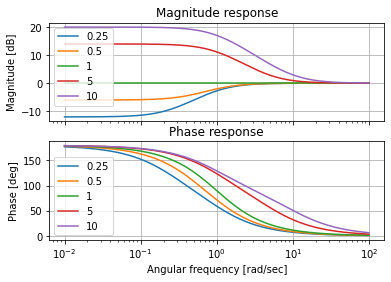

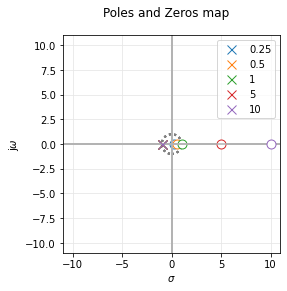

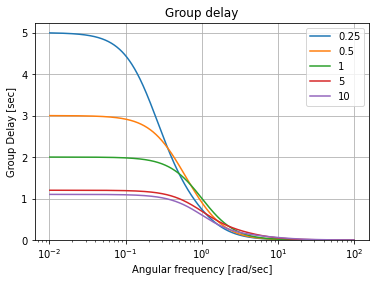

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from splane import analyze_sys, pretty_print_bicuad_omegayq

all_sos = []
all_values = [0.25,0.5, 1,5,10]

for ii in all_values:
    
    R = ii
    
    num = np.array([1, -R]) 
    den = np.array([1, 1])
    
    mi_sos = sig.TransferFunction(num,den)

    all_sos += [mi_sos]
    
plt.close('all')
analyze_sys(all_sos, sys_name=all_values)

&emsp;4.&emsp;&emsp;Se simuló el siguiente circuito en LTSpice obteniendo como resultado la transferencia de módulo y de fase

<center><img src="./circ-spice.png"></center>

<center><img src="./bode1.jpg"></center>

&emsp;5.&emsp;&emsp; La utilidad que pueden tener los filtros pasa-todo es que al solo modificar la fase, y por consiguiente el retardo, logra que todas las componentes de la señal de entrada tengan el mismo retardo luego de que este fue variando por el procesamiento previo por el que pasaron.

### Bonus

Red normalizada que corresponde al punto 3. (Para que sea Pasa Todo tome $R_1 = R_2 = 1$)

<center><img src="./circ-norm.jpg"></center>
<center><img src="./bode-norm.jpg"></center>

Código con la librería SymPy para verificar 1 y 2